In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

from tensorflow.keras.layers import Dense, Flatten, Conv2D , MaxPooling2D, Dropout
from tensorflow import keras
from sklearn.model_selection import train_test_split

In [ ]:
#loading testing and training dataframe
df_train=pd.read_csv("/content/test.csv")
df_test=pd.read_csv("/content/test.csv")

In [ ]:
#creating testing and training array
training = np.array(df_train,dtype='float32')
testing=np.array(df_test,dtype='float32')

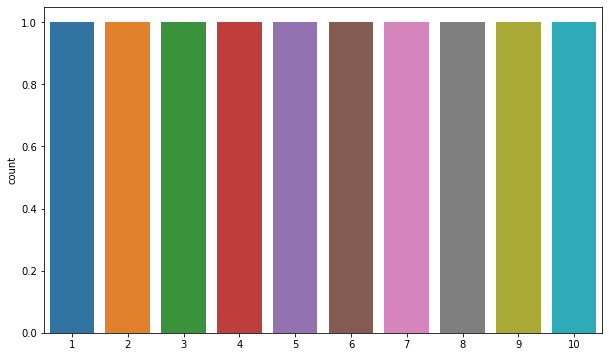

In [ ]:
#chacking for the target classes whether they are balanced
label=[1,2,3,4,5,6,7,8,9,10]
plt.figure(figsize=(10,6))
sns.countplot(x=label,data=df_train)

ValueError: ignored

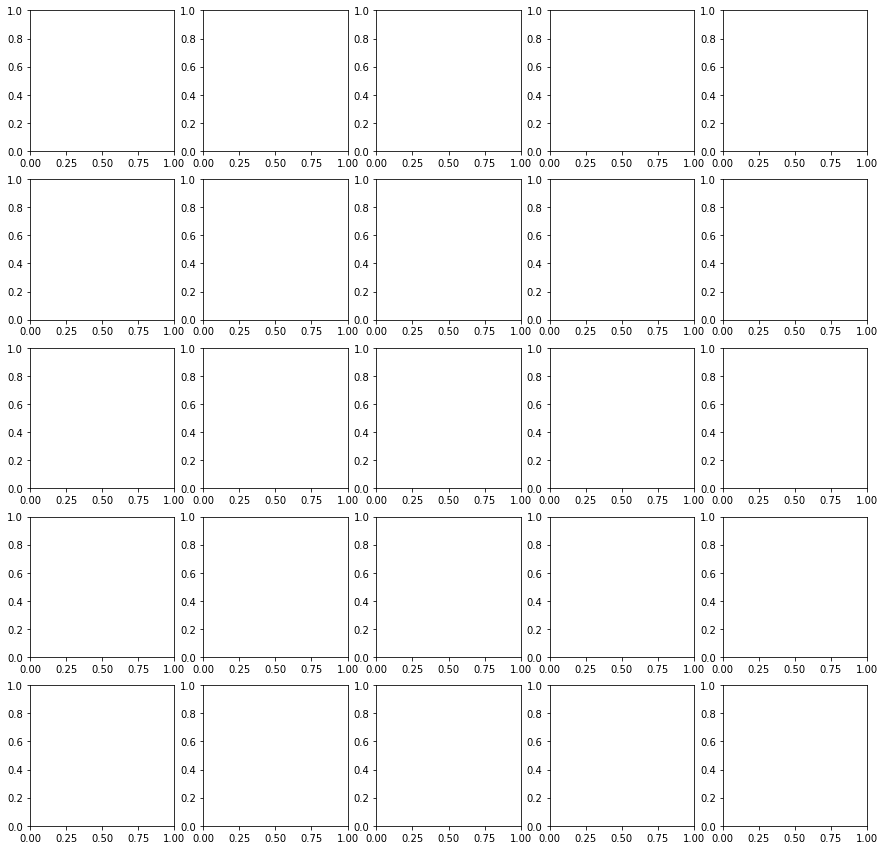

In [ ]:
#visualize the training data
Width = 5
Height =5
fig , axes=plt.subplots(Width,Height,figsize=(15,15))
#flatten the matrix into array(for easy indexing)
axes=axes.reshape(-1)
#show a random number
for i in np.arange(0,Width * Height):

#show a random number 
    index=np.random.randint(0,len(df_train))

#read and display an image with the selected index
    axes[i].imshow(training[index,1:].reshape((28,28)),cmap="gray")

    axes[i].set_title(training[index,0].astype(int),fontsize = 15)
# The label
    axes[i].axis('off')
plt.show()

ValueError: ignored

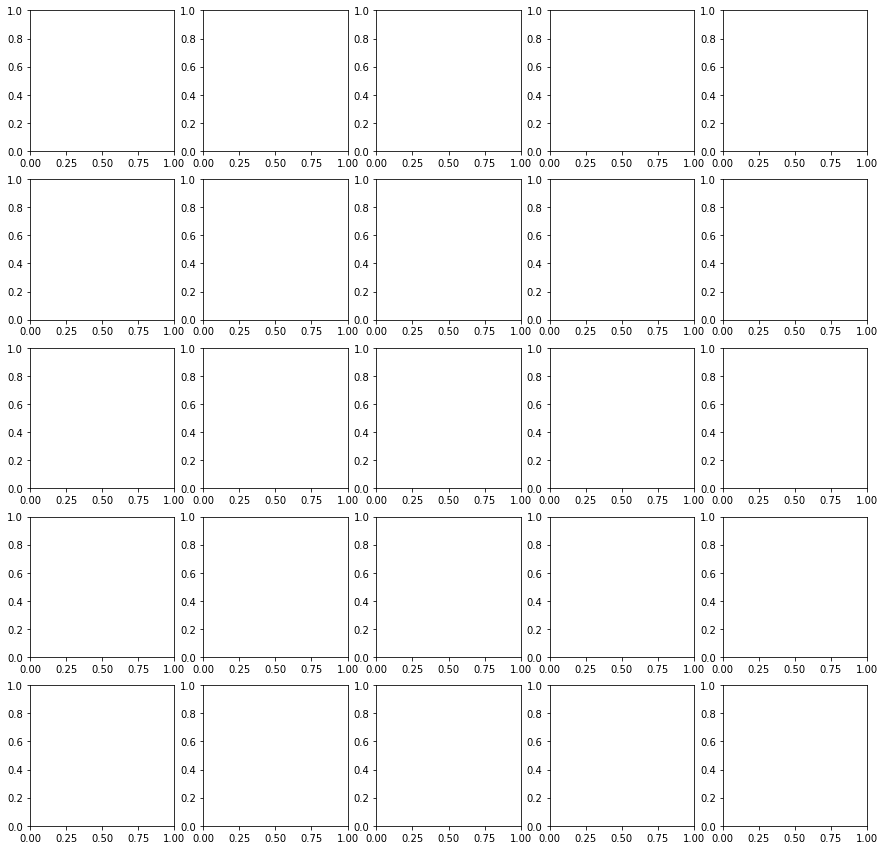

In [ ]:
#visualize the test data
#visualize the training data
width = 5
height =5
fig , axes=plt.subplots(Height,Width,figsize=(15,15))
#flatten the matrix into array(for easy indexing)
axes=axes.reshape(-1)

#show a random number
for i in np.arange(0,Width * Height):

#select a random number 
    index=np.random.randint(0,len(testing))

#read and display an image with the selected index
    axes[i].imshow(testing[index,1:].reshape((28,28)),cmap="gray")

# The label
    axes[i].axis('off')
plt.show()

In [ ]:
#splitting on images and labels
x_train_data =training[:,1:]
y_train_data =keras.utils.to_categorical(training[:,0],10)

#test data
test_data=testing

#Normalization
x_train_data=x_train_data/255
test_data=test_data/255


In [ ]:
#splitting on tgraining and validation sets
x_train,x_val,y_train,y_val=train_test_split(x_train_data,y_train_data,test_size=0.2)

In [ ]:
#reshaping all sets
x_train=x_train.reshape(x_train.shape[0],28,28,1)
x_val=x_val.reshape(x_val.shape[0],28,28,1)
test_data=test_data.reshape(test_data.shape[0],28,28,1)

x_train.shape,x_val.shape,y_train.shape,y_val.shape,test_data.shape

ValueError: ignored

In [ ]:
#creating a cnn model
model=keras.Sequential([
                        conv2D(32, 3,activation='relu',input_shape=(28,28,1)),
                        MaxPooling2D(2 , padding='same'),
                        conv2D(64,3,activation='relu'),
                        MaxPooling2D(2,padding='same'),
                        Flatten(),
                        Dense(128,activation='relu'),
                        Dropout(0.5),
                        Dense(10,activation='softmax')
                    
                  )])
model.summary()

In [ ]:
#compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics='accuracy')

In [ ]:
#fix random state for reproducible results
tf.random.set_seed(42)

#fit the model and save history
history=model.fit(x_train,
                  y_train,
                  batch_size=32,
                  epochs=15,
                  validation_data=(x_val,y_val))

In [ ]:
fig,axes=plt.subplots(2,1,figsize=(15,15))
history_df= pd.DataFrame(history.history)

axes[0].plot(history_df[['loss','val_loss']],linewidth=1)
axes[0].legend(['loss','val_loss'])
axes[1].plot(history_df[['accuracy','val_accuracy',]],linewidth=1)
axes[1].legend(['accuracy','val_accuracy'])

plt.show()

In [ ]:
predictions = pd.read_csv("")
predictions.drop("Lbael",axis=1,inplace=True)
predictions["Label"]=model.predict(test_data).argmax(axis=1)

In [ ]:
x_train [...,np.newaxis].shape

(5972, 783, 1)

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from sklearn.preprocessing import StandardScaler
import torchvision
from torchvision import transforms, datasets
import numpy as np
import pandas as pd
import joblib

In [ ]:
features = pd.read_csv('/content/train.csv').drop('label',axis=1)
features.head(5)

scaler = StandardScaler()
df_x = torch.tensor(scaler.fit_transform(features))
joblib.dump(scaler,"scaler.pkl")

['scaler.pkl']

In [ ]:
df_y = torch.tensor(pd.read_csv('/content/train.csv')['label'].values)
train_tensor = torch.utils.data.TensorDataset(df_x,df_y)
trainset = torch.utils.data.DataLoader(train_tensor,shuffle=True,batch_size=20)

In [ ]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(28*28,64,dtype=torch.float64)
        self.fc2 = nn.Linear(64,64,dtype=torch.float64)
        self.fc3 = nn.Linear(64,64,dtype=torch.float64)
        self.fc4 = nn.Linear(64,10,dtype=torch.float64)

    def Forward_Prop(self,X):
        X = F.relu(self.fc1(X))
        X = F.relu(self.fc2(X))
        X = F.relu(self.fc3(X))
        X = F.log_softmax(self.fc4(X),dim=1)
        return X

In [ ]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(28*28,64,dtype=torch.float64)
        self.fc2 = nn.Linear(64,64,dtype=torch.float64)
        self.fc3 = nn.Linear(64,64,dtype=torch.float64)
        self.fc4 = nn.Linear(64,10,dtype=torch.float64)

    def Forward_Prop(self,X):
        X = F.relu(self.fc1(X))
        X = F.relu(self.fc2(X))
        X = F.relu(self.fc3(X))
        X = F.log_softmax(self.fc4(X),dim=1)
        return X

In [ ]:
scaler = joblib.load('scaler.pkl')
testset = scaler.transform(pd.read_csv('/content/test.csv'))
testset = torch.tensor(testset)

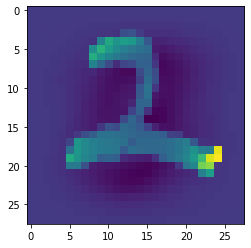

In [ ]:
i = 78
import matplotlib.pyplot as plt
plt.imshow(testset[i].view(28,28))
plt.show()
